In [22]:
import duckdb as db
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
def sql(query, database = "../data/database.duckdb"):
    con = db.connect(database)
    res = con.execute(query).df()
    con.close()
    return res

In [4]:
df = pd.DataFrame(sql(
    """  
    SELECT 
    startYear,
    runtimeMinutes
    FROM title_basics
    ORDER BY startYear 
    """
))

In [5]:
df = df[df['runtimeMinutes'].str.isnumeric()]
df = df[df['startYear'].str.isnumeric()]
df['runtimeMinutes'] = df['runtimeMinutes'].astype(int)
df['decade'] = df['startYear'].map(lambda x : (int(x)//10)*10)
df.groupby('decade')['runtimeMinutes'].mean().reset_index()


,decade,runtimeMinutes
0,1890,85.250000
1,1900,68.333333
2,1910,61.647468
3,1920,71.597367
4,1930,80.321209
5,1940,85.817031
6,1950,90.329374
7,1960,92.841720
8,1970,90.479972
9,1980,91.736200


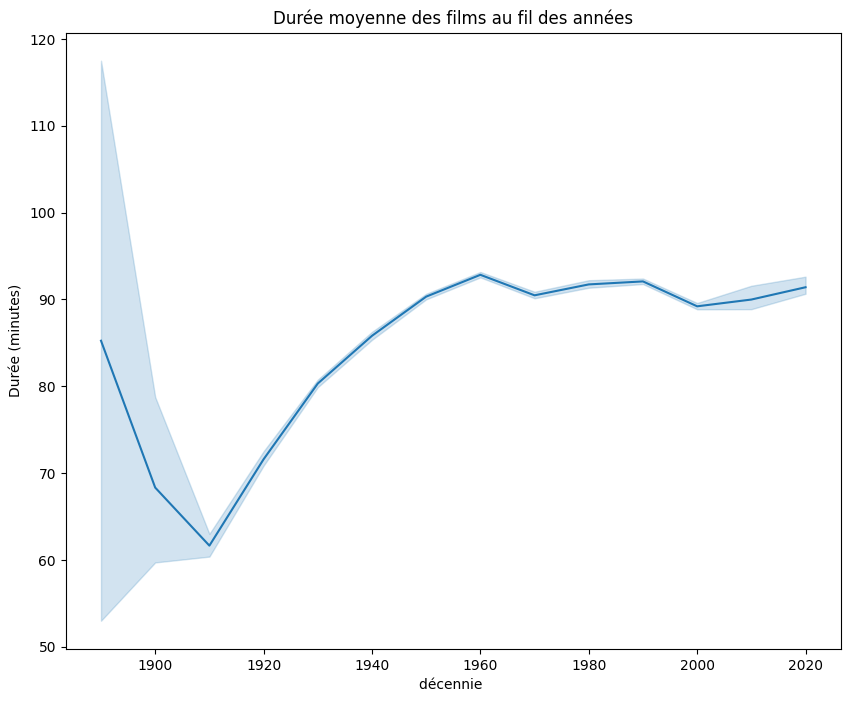

In [6]:
plt.figure(figsize=(10,8))
sns.lineplot(
    data=df,
    x= 'decade',
    y='runtimeMinutes'
)
plt.title('Durée moyenne des films au fil des années')
plt.ylabel('Durée (minutes)')
plt.xlabel('décennie ')
plt.savefig('../visuals/duree_moyenne_films.png')
plt.show()

In [13]:
sql(
    """  
    SELECT
    *
    FROM name_basics
    where birthYear not like '\\N'
    limit 10
    """
)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,producer,soundtrack","tt0034583,tt0038109,tt0036855,tt0038787"
6,nm0000007,Humphrey Bogart,1899,1957,"actor,producer,miscellaneous","tt0034583,tt0043265,tt0033870,tt0037382"
7,nm0000008,Marlon Brando,1924,2004,"actor,director,writer","tt0078788,tt0068646,tt0047296,tt0070849"
8,nm0000009,Richard Burton,1925,1984,"actor,producer,director","tt0061184,tt0087803,tt0059749,tt0057877"
9,nm0000010,James Cagney,1899,1986,"actor,director,producer","tt0029870,tt0031867,tt0042041,tt0034236"


In [50]:
df = pd.DataFrame(sql("""    
    
    select distinct
    Tconst as tconst,
    tb.primaryTitle as Title,
    tb.genres as Genres,
    t.Budget as Budget,
    t.Revenue as Revenue,
    from title_basics tb
    join tmdb t on t.imdb_id = tb.tconst
    order by Genres, Revenue desc
    """))

df

,tconst,Title,Genres,Budget,Revenue
0,tt0099452,The Cyprus Tigers,Action,0,91285865
1,tt2025526,War of the Arrows,Action,8000000,49000000
2,tt3919278,The Four 3,Action,0,32000000
3,tt5297256,Pulimurugan,Action,3800000,29000000
4,tt1258972,The Man with the Iron Fists,Action,15000000,20546518
...,...,...,...,...,...
205523,tt5556408,Harry: Portrait d'un détective privé,\N,30000,0
205524,tt5302584,Kyonyû kariudo: Gen'yô no bishô,\N,0,0
205525,tt3572688,Danchizuma: Sarakin Jigoku,\N,0,0
205526,tt0022948,Glück über Nacht,\N,0,0


In [51]:
df = df['Genres'].value_counts()
df

Genres
Drama                        32703
Comedy                       17068
Documentary                  16276
Comedy,Drama                  7575
Drama,Romance                 6813
                             ...  
Animation,Fantasy,War            1
Animation,History,Music          1
Animation,History,Musical        1
Animation,History,War            1
Sport,Western                    1
Name: count, Length: 1155, dtype: int64

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Genres',order = df['Genres'].value_counts().index, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

KeyError: 'Genres'

<Figure size 1200x600 with 0 Axes>

In [23]:
sql("""    
    
    select distinct
    Tconst as tconst,
    tb.primaryTitle as Title,
    tb.genres as Genres,
    startYear as Year,
    runtimeMinutes as Runtime,
    nb.primaryName as Director,
    tr.averageRating as Rating,
    tr.numVotes as Votes,
    t.Budget as Budget,
    t.Revenue as Revenue,
    production_companies_name as ProductionCompanies,
    production_companies_country as ProductionCountries,
    t.poster_path as Poster
    from title_basics tb
    join title_akas ta on tconst = titleId
    join title_crew using (tconst)
    join name_basics nb on directors = nconst
    join tmdb t on t.imdb_id = tb.tconst
    join title_ratings tr on tb.tconst = tr.tconst
    
    ORDER BY Revenue desc
    
    """)

,tconst,Title,Genres,Year,Runtime,Director,Rating,Votes,Budget,Revenue,ProductionCompanies,ProductionCountries,Poster
0,tt0499549,Avatar,"Action,Adventure,Fantasy",2009,162,James Cameron,7.9,1431464,237000000,2923706026,"['Dune Entertainment', 'Lightstorm Entertainme...","['US', 'US', 'US', 'GB']",/jRXYjXNq0Cs2TcJjLkki24MLp7u.jpg
1,tt1630029,Avatar: The Way of Water,"Action,Adventure,Fantasy",2022,192,James Cameron,7.5,534468,460000000,2319331580,"['20th Century Studios', 'Lightstorm Entertain...",None,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg
2,tt0120338,Titanic,"Drama,Romance",1997,194,James Cameron,7.9,1339898,200000000,2264162353,"['Paramount', '20th Century Fox', 'Lightstorm ...","['US', 'US', 'US']",/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg
3,tt2488496,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Sci-Fi",2015,138,J.J. Abrams,7.8,1000228,245000000,2068223624,"['Lucasfilm Ltd.', 'Bad Robot']",None,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg
4,tt10872600,Spider-Man: No Way Home,"Action,Adventure,Fantasy",2021,148,Jon Watts,8.2,952457,200000000,1921847111,"['Marvel Studios', 'Pascal Pictures', 'Columbi...","['US', 'US', 'US']",/uJYYizSuA9Y3DCs0qS4qWvHfZg4.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171420,tt8908002,Luka Chuppi,"Comedy,Romance",2019,126,Laxman Utekar,6.4,14223,0,0,"['Maddock Films', 'Jio Studios']","['IN', 'IN']",/pa7zam9rAUBZEbfEuFQszaId4tQ.jpg
171421,tt8923508,Represent,Documentary,2020,93,Hillary Bachelder,6.9,31,0,0,"['Music Box Films', 'ITVS', 'Fork Films', 'Kar...","['US', 'US', 'US', 'US', 'US', 'US']",/sCbLx8gcc6f2tbkGz8JkJDz7JnJ.jpg
171422,tt9844004,Messi,Sport,2017,130,Riingo Banerjee,6.4,22,0,0,[],[],/inKjNQkv18k28wAyDqdmhTL2lhW.jpg
171423,tt9849230,After-School Starlight,"Comedy,Drama,Romance",2019,99,Kentarô Ohtani,5.0,32,0,0,[],[],/7QwSiGVBkIGUKICWwewPDFxdNC1.jpg
